# **Feature Engineering**

---

1. Import packages
2. Load data
3. Feature engineering

---

## **1. Import packages**

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## **2. Load data**

In [188]:
client_df = pd.read_csv('/content/drive/MyDrive/client_data.csv')


## **3. Feature engineering**

### **Changing field types into their appropriate type**


In [189]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Change date columns('date_activ','date_end','date_modif_prod','date_renewal') from 'object' to 'datetime' type.

Change categorical variables(channel_sales) from 'object' to 'category' type.



In [190]:
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')

#another way of changing the date columns to appropriate types 
# date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
# train = pd.read_csv('train_clean.csv',parse_dates=date_cols)

In [191]:
client_df['channel_sales']=client_df['channel_sales'].astype('category')

In [192]:
#checking the types again
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  category      
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

### **Change boolean data(only two values) into binary 1 and 0**


In [193]:
client_df.has_gas=client_df.has_gas.replace(["t", "f"],[1,0])
client_df.has_gas.value_counts()

0    11955
1     2651
Name: has_gas, dtype: int64

### **One-hot encode the category columns**
One hot encoding can handle unknown variables(it didn't know during encoding) during testing and such by ignoring it unlike pandas get_dummies()


In [194]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [195]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [196]:
category_lists=list(client_df['channel_sales'].unique())

In [197]:
from sklearn.preprocessing import OneHotEncoder
def OneHotEncodeFeatures(df,col):
  ohe = OneHotEncoder(sparse=False)
  ohe.fit(df[[col]])
  category_lists=list(df[col].unique())
  category_names=[col[:7]+'_'+col_name[:4] for col_name in category_lists]
  temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=category_names)
  df.drop(columns=[col], axis=1, inplace=True)
  df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
  return df

client_df = OneHotEncodeFeatures(client_df,'channel_sales')
client_df = OneHotEncodeFeatures(client_df,'origin_up')

In [198]:
client_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,channel_ewpa,channel_epum,channel_sddi,channel_fixd,origin__lxid,origin__kamk,origin__ldks,origin__MISS,origin__usap,origin__ewxe
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [199]:
price_df = pd.read_csv('/content/drive/MyDrive/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

Since, the price data are skewed we will use the median for the below analysis.

In [200]:
median_year=price_df.groupby(['id']).median().reset_index()
median_6m=price_df[price_df['price_date']>'2015-06-01'].groupby(['id']).median().reset_index()
median_3m=price_df[price_df['price_date']>'2015-10-01'].groupby(['id']).median().reset_index()

In [201]:
#Combine the mean year in a single dataframe
median_year=median_year.rename(index=str,columns={'price_off_peak_var':'median_year_price_ofp_var',
                                              'price_peak_var':'median_year_price_p_var',
                                              'price_mid_peak_var':'median_year_price_midp_var',
                                              'price_off_peak_fix':'median_year_price_ofp_fix',
                                              'price_peak_fix':'median_year_price_p_fix',
                                              'price_mid_peak_fix':'median_year_price_midp_fix',})
median_year['median_year_price_ofp']=median_year['median_year_price_ofp_var']+median_year['median_year_price_ofp_fix']
median_year['median_year_price_p']=median_year['median_year_price_p_var']+median_year['median_year_price_p_fix']
median_year['median_year_price_midp']=median_year['median_year_price_midp_var']+median_year['median_year_price_midp_fix']
median_6m=median_6m.rename(index=str,columns={'price_off_peak_var':'median_6m_price_ofp_var',
                                              'price_peak_var':'median_6m_price_p_var',
                                              'price_mid_peak_var':'median_6m_price_midp_var',
                                              'price_off_peak_fix':'median_6m_price_ofp_fix',
                                              'price_peak_fix':'median_6m_price_p_fix',
                                              'price_mid_peak_fix':'median_6m_price_midp_fix',})
median_6m['median_6m_price_ofp']=median_6m['median_6m_price_ofp_var']+median_6m['median_6m_price_ofp_fix']
median_6m['median_6m_price_p']=median_6m['median_6m_price_p_var']+median_6m['median_6m_price_p_fix']
median_6m['median_6m_price_midp']=median_6m['median_6m_price_midp_var']+median_6m['median_6m_price_midp_fix']
median_3m=median_3m.rename(index=str,columns={'price_off_peak_var':'median_3m_price_ofp_var',
                                              'price_peak_var':'median_3m_price_p_var',
                                              'price_mid_peak_var':'median_3m_price_midp_var',
                                              'price_off_peak_fix':'median_3m_price_ofp_fix',
                                              'price_peak_fix':'median_3m_price_p_fix',
                                              'price_mid_peak_fix':'median_3m_price_midp_fix',})
median_3m['median_3m_price_ofp']=median_3m['median_3m_price_ofp_var']+median_3m['median_3m_price_ofp_fix']
median_3m['median_3m_price_p']=median_3m['median_3m_price_p_var']+median_3m['median_3m_price_p_fix']
median_3m['median_3m_price_midp']=median_3m['median_3m_price_midp_var']+median_3m['median_3m_price_midp_fix']

In [202]:
price_new_df=pd.merge(median_year,median_6m, on='id',how='left')
price_new_df=pd.merge(price_new_df,median_3m, on='id',how='left')
price_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          16096 non-null  object 
 1   median_year_price_ofp_var   16096 non-null  float64
 2   median_year_price_p_var     16096 non-null  float64
 3   median_year_price_midp_var  16096 non-null  float64
 4   median_year_price_ofp_fix   16096 non-null  float64
 5   median_year_price_p_fix     16096 non-null  float64
 6   median_year_price_midp_fix  16096 non-null  float64
 7   median_year_price_ofp       16096 non-null  float64
 8   median_year_price_p         16096 non-null  float64
 9   median_year_price_midp      16096 non-null  float64
 10  median_6m_price_ofp_var     16096 non-null  float64
 11  median_6m_price_p_var       16096 non-null  float64
 12  median_6m_price_midp_var    16096 non-null  float64
 13  median_6m_price_ofp_fix     160

In [203]:
cor_matrix=price_new_df.corr()

In [204]:
import numpy as np

In [206]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(len(to_drop))

#Now we are droping the columns which are in the list 'to_drop' from the dataframe

df1 = price_new_df.drop(to_drop, axis=1)

24


In [207]:
df1.columns

Index(['id', 'median_year_price_ofp_var', 'median_year_price_p_var',
       'median_year_price_ofp_fix'],
      dtype='object')

The above correlation analysis shows that the only three uncorrelated variables here are **median_year_price_ofp_var, median_year_price_p_var, median_year_price_ofp_fix**. So, these are what we are going to use for analysis. 

Is this symmetric though? 


### **Difference between off-peak prices in December and preceding January**

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [208]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


So, the above features will be selected for modelling.

### **Check for highly correlated features in the client numeric data.**
- In order to drop them.

In [209]:
client_df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'channel_foos',
       'channel_MISS', 'channel_lmke', 'channel_usil', 'channel_ewpa',
       'channel_epum', 'channel_sddi', 'channel_fixd', 'origin__lxid',
       'origin__kamk', 'origin__ldks', 'origin__MISS', 'origin__usap',
       'origin__ewxe'],
      dtype='object')

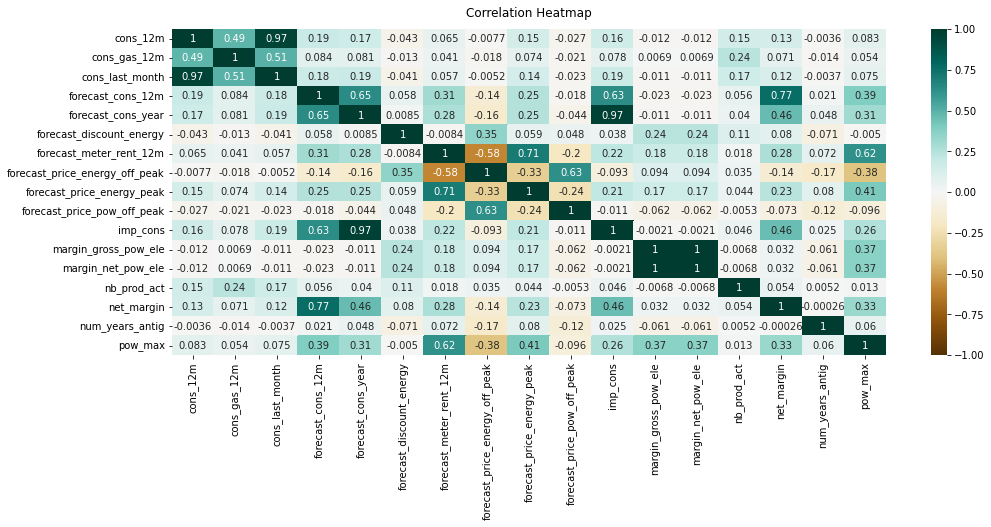

In [210]:
no_corr_analysis=['has_gas','churn','id','channel_foos','channel_MISS', 'channel_lmke', 'channel_usil','channel_ewpa', 'channel_epum', 'channel_sddi', 'channel_fixd', 'origin__lxid',
       'origin__kamk', 'origin__ldks', 'origin__MISS', 'origin__usap',
       'origin__ewxe']
plt.figure(figsize=(16, 6))
client_df_for_corr_analysis=client_df.drop(columns=no_corr_analysis)
cor_matrix2=client_df_for_corr_analysis.corr()
heatmap = sns.heatmap(cor_matrix2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [211]:
upper_tri2 = cor_matrix2.where(np.triu(np.ones(cor_matrix2.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri2.columns if any(upper_tri2[column] > 0.80)]
print(to_drop)

#Now we are droping the columns which are in the list 'to_drop' from the dataframe

client_df = client_df.drop(to_drop, axis=1)
client_df_for_corr_analysis = client_df_for_corr_analysis.drop(to_drop, axis=1)

['cons_last_month', 'imp_cons', 'margin_net_pow_ele']


'cons_last_month', 'imp_cons', 'margin_net_pow_ele' are highly(more than 80%) correlated to certain other features so we are removing them.

### **Removing Outliers**
Since we discovered in the EDA that most of the numeric data are skewed, we will remove outliers using IQR.

In [213]:
client_df_for_corr_analysis.skew()
#highly skewed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


cons_12m                           5.997308
cons_gas_12m                       9.597530
forecast_cons_12m                  7.155853
forecast_cons_year                16.587990
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
margin_gross_pow_ele               4.472632
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
dtype: float64

In [214]:
def remove_outliers_IQR(df,cols):
  for col in cols:
      df.loc[df[col]<0,col]=df[col].median()
      q1=df[col].quantile(.25)
      q3=df[col].quantile(.75)
      iqr=q3-q1
      upper_bound=q3+(iqr*1.5)
      lower_bound=q1-(iqr*1.5)
      df[col] = np.where(df[col] >= upper_bound,
              upper_bound,
              np.where(df[col] <= lower_bound,
              lower_bound,
              df[col]))

In [215]:
client_df_list=client_df_for_corr_analysis.select_dtypes(include=np.number).columns.tolist()
client_df_list

['cons_12m',
 'cons_gas_12m',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'margin_gross_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max']

In [216]:
remove_outliers_IQR(client_df_for_corr_analysis,client_df_list)

In [217]:
#checking if the skewness has decreased
client_df_for_corr_analysis.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


cons_12m                          1.170118
cons_gas_12m                      0.000000
forecast_cons_12m                 1.108772
forecast_cons_year                1.240244
forecast_discount_energy          0.000000
forecast_meter_rent_12m           0.953549
forecast_price_energy_off_peak    0.090157
forecast_price_energy_peak       -0.014331
forecast_price_pow_off_peak      -0.104028
margin_gross_pow_ele              0.554187
nb_prod_act                       0.000000
net_margin                        1.115920
num_years_antig                   0.576127
pow_max                           1.143216
dtype: float64

In [218]:
price_new_df_1=price_new_df[['median_year_price_ofp_var', 'median_year_price_p_var','median_year_price_ofp_fix']]

In [219]:
price_new_df_1.skew()

median_year_price_ofp_var   -0.323908
median_year_price_p_var     -0.122975
median_year_price_ofp_fix   -2.782547
dtype: float64

In [220]:
remove_outliers_IQR(price_new_df,list(price_new_df_1.columns))

In [221]:
price_new_df[['median_year_price_ofp_var', 'median_year_price_p_var','median_year_price_ofp_fix']].skew()

median_year_price_ofp_var    0.138167
median_year_price_p_var     -0.122975
median_year_price_ofp_fix    0.379020
dtype: float64

The above features seem to be of a normal distribution. So, we are going to leave them be.

### **Merging the features**

In [244]:
final_df=pd.merge(client_df, price_new_df[['id','median_year_price_ofp_var', 'median_year_price_p_var','median_year_price_ofp_fix']], on='id', how='left')
final_df=pd.merge(final_df,diff, on='id', how='left')


In [245]:
final_df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'margin_gross_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'churn', 'channel_foos', 'channel_MISS', 'channel_lmke',
       'channel_usil', 'channel_ewpa', 'channel_epum', 'channel_sddi',
       'channel_fixd', 'origin__lxid', 'origin__kamk', 'origin__ldks',
       'origin__MISS', 'origin__usap', 'origin__ewxe',
       'median_year_price_ofp_var', 'median_year_price_p_var',
       'median_year_price_ofp_fix', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power'],
      dtype='object')

In [246]:
final_df.drop(columns=['date_activ', 'date_end','date_modif_prod', 'date_renewal','id'], inplace=True)

In [247]:
final_df = final_df.astype({'channel_foos':'int', 'channel_MISS':'int', 'channel_lmke':'int',
       'channel_usil':'int', 'channel_ewpa':'int', 'channel_epum':'int', 'channel_sddi':'int',
       'channel_fixd':'int', 'origin__lxid':'int', 'origin__kamk':'int', 'origin__ldks':'int',
       'origin__MISS':'int', 'origin__usap':'int', 'origin__ewxe':'int'}) 

In [248]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cons_12m                         14606 non-null  int64  
 1   cons_gas_12m                     14606 non-null  int64  
 2   forecast_cons_12m                14606 non-null  float64
 3   forecast_cons_year               14606 non-null  int64  
 4   forecast_discount_energy         14606 non-null  float64
 5   forecast_meter_rent_12m          14606 non-null  float64
 6   forecast_price_energy_off_peak   14606 non-null  float64
 7   forecast_price_energy_peak       14606 non-null  float64
 8   forecast_price_pow_off_peak      14606 non-null  float64
 9   has_gas                          14606 non-null  int64  
 10  margin_gross_pow_ele             14606 non-null  float64
 11  nb_prod_act                      14606 non-null  int64  
 12  net_margin        

In [249]:
Y=final_df['churn']
X=final_df.drop('churn', axis=1)

In [250]:
#Check the binary target
Y.value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [251]:
#Spliting dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [252]:
from inspect import modulesbyfile
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier 
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
model=RandomForestClassifier()
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# results.append(cv_results)
# names.append(name)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2645
           1       0.79      0.05      0.10       277

    accuracy                           0.91      2922
   macro avg       0.85      0.53      0.53      2922
weighted avg       0.90      0.91      0.87      2922

